# 캐글 머신러닝을 이용한 날씨 예측
https://www.kaggle.com/smokingkrils/temperature-forecast-project-using-ml

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [52]:
df = pd.read_csv('D:prac/Weather Forecasting/temp.csv')

In [53]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [55]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [56]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

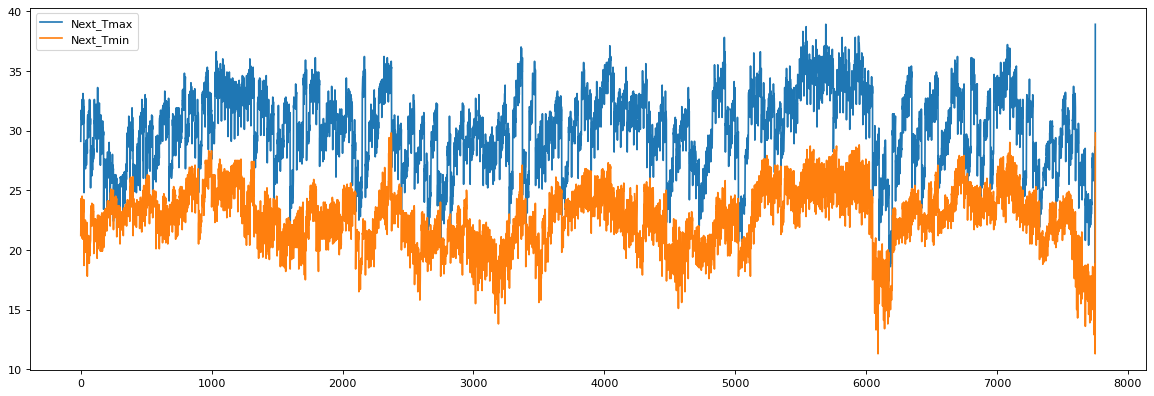

In [57]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(df["Next_Tmax"],label="Next_Tmax")
plt.plot(df["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

In [58]:
def preprocessing(df):
    df = df.drop(["Date"],axis=1)
    df = df.dropna(axis=0)
    
    X = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
    y_max = df["Next_Tmax"]
    y_min = df["Next_Tmin"]
    return X,y_max,y_min

In [59]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=0)

In [65]:
X_train, y_max_train, y_min_train  = preprocessing(train)
X_test, y_max_test, y_min_test  = preprocessing(test)

In [74]:
y_min_test

4271    21.3
971     27.2
7541    22.2
4806    20.3
2048    24.8
        ... 
1290    21.8
5078    20.7
735     23.9
3302    21.5
5019    22.0
Name: Next_Tmin, Length: 1520, dtype: float64

In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import cross_validate, GridSearchCV

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1, normalize=True, fit_intercept=True)
lr.fit(X_train, y_max_train)
lr.score(X_test,y_max_test)

0.7965728751681249

In [112]:
lr.fit(X_train, y_min_train)
lr.score(X_test,y_min_test)

0.835327224396716

In [114]:
from sklearn.tree import DecisionTreeRegressor
dtcl = DecisionTreeRegressor()
dtcl.fit(X_train,y_max_train)
dtcl.score(X_test, y_max_test)

0.7766752062133616

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_max_train)
rf.score(X_test, y_max_test)

0.9026323611915573

In [119]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(5, shuffle=True, random_state=11)
cvs = cross_val_score(rf, X_test, y_max_test, scoring="r2", cv=cv)
cvs

array([0.85802368, 0.81620827, 0.84607191, 0.7607968 , 0.86206343])

In [80]:
reg_max = make_pipeline(StandardScaler(),SGDRegressor())
reg_max.fit(X_train, y_max_train)

reg_min = make_pipeline(StandardScaler(), SGDRegressor())
reg_min.fit(X_train, y_min_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [81]:
cv_results_min = cross_validate(reg_min, X_train, y_min_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)
cv_results_max = cross_validate(reg_max, X_train, y_max_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)

print('Next_Tmin')
print('Test RMSE :' , -cv_results_min['test_neg_root_mean_squared_error'].mean())
print('Test r2 :' , cv_results_min['test_r2'].mean())
print("Train RMSE :" , -cv_results_min['train_neg_root_mean_squared_error'].mean())
print("Train r2 :" , cv_results_min['train_r2'].mean())
print("=====================================================")
print('Next_Tmax')
print('Test RMSE :' , -cv_results_max['test_neg_root_mean_squared_error'].mean())
print('Test r2 :' , cv_results_max['test_r2'].mean())
print("Train RMSE :" , -cv_results_max['train_neg_root_mean_squared_error'].mean())
print("Train r2 :" , cv_results_max['train_r2'].mean())

Next_Tmin
Test RMSE : 1.0107609123802441
Test r2 : 0.8333725118626159
Train RMSE : 1.0062854728621062
Train r2 : 0.83533221913924
Next_Tmax
Test RMSE : 1.4702236088621596
Test r2 : 0.7757245340118215
Train RMSE : 1.4670213978973843
Train r2 : 0.7769688429293458


In [82]:
predict_Next_Tmin = reg_min.predict(X_test)
predict_Next_Tmax = reg_max.predict(X_test)

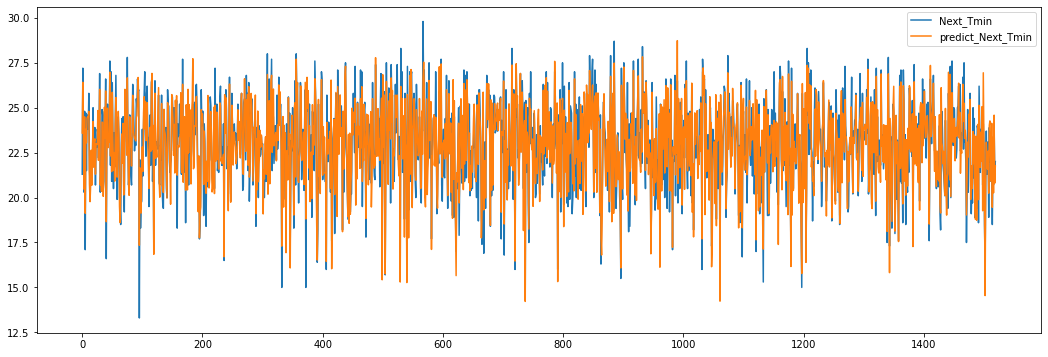

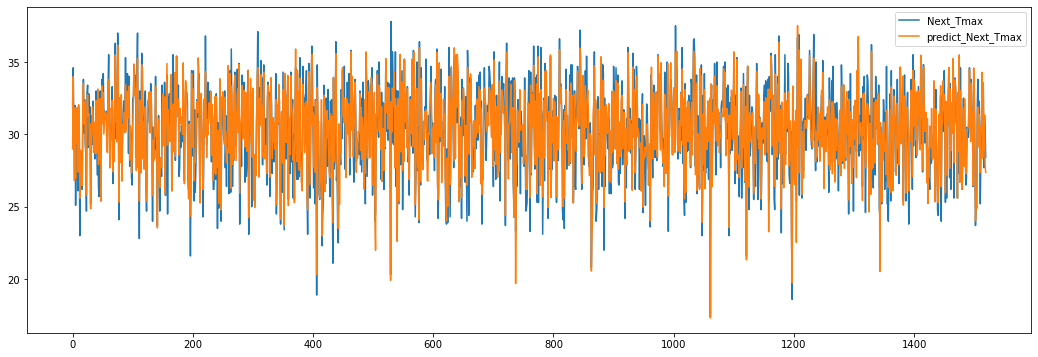

In [83]:
plt.figure(figsize=(18,6))
plt.plot(y_min_test.to_numpy(),label="Next_Tmin")
plt.plot(predict_Next_Tmin,label="predict_Next_Tmin")
plt.legend()
plt.show()

plt.figure(figsize=(18,6))
plt.plot(y_max_test.to_numpy(),label="Next_Tmax")
plt.plot(predict_Next_Tmax,label="predict_Next_Tmax")
plt.legend()
plt.show()

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 130],
    'max_features': [None],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2],
    'n_estimators': [100, 300, 500, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [93]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Average Error: {:.4f}'.format(np.mean(errors)))
    print('Accuracy = {:.2f}%'.format(accuracy))
    
    return accuracy

In [94]:
grid_search.fit(X_train, y_max_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_max_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'bootstrap': True, 'max_depth': 130, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}
Model Performance
Average Error: 0.7226 degrees.
Accuracy = 97.57%.


In [95]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_max_train)
base_accuracy = evaluate(base_model, X_test, y_max_test)
print('Improvement - {:.2f}%'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.7870 degrees.
Accuracy = 97.36%.
Improvement of 0.22%.


In [96]:
grid_search.fit(X_train, y_min_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_min_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'bootstrap': True, 'max_depth': 70, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Model Performance
Average Error: 0.5815 degrees.
Accuracy = 97.39%.


In [97]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_min_train)
base_accuracy = evaluate(base_model, X_test, y_min_test)
print('Improvement - {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.6310 degrees.
Accuracy = 97.16%.
Improvement of 0.23%.


In [120]:
Next_Tmax_rfr = RandomForestRegressor(random_state = 33,
                                      bootstrap=True, max_depth=120, max_features=4, 
                                     min_samples_leaf=2, min_samples_split=4, n_estimators=500)
Next_Tmin_rfr = RandomForestRegressor(random_state = 33, 
                                      bootstrap=True, max_depth=50, max_features=4, 
                                      min_samples_leaf=2, min_samples_split=4, n_estimators=500)


print("---Next_Tmax---")
Next_Tmax_TreeRegressor.fit(X_train,y_max_train)
Next_Tmax_Accuracy = evaluate(Next_Tmax_TreeRegressor, X_test, y_max_test)

base_max_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_max_model.fit(X_train, y_max_train)
base_max_accuracy = evaluate(base_max_model, X_test, y_max_test)

print('Improvement {:0.2f}%.'.format( 100 * (Next_Tmax_Accuracy - base_max_accuracy) / base_max_accuracy))
print("---------")


print("---Next_Tmin---")
Next_Tmin_TreeRegressor.fit(X_train,y_min_train)
Next_Tmin_Accuracy = evaluate(Next_Tmin_TreeRegressor, X_test, y_min_test)

base_min_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_min_model.fit(X_train, y_min_train)
base_min_accuracy = evaluate(base_min_model, X_test, y_min_test)

print('Improvement {:0.2f}%.'.format( 100 * (Next_Tmin_Accuracy - base_min_accuracy) / base_min_accuracy))

---Next_Tmax---
Model Performance
Average Error: 0.7021 degrees.
Accuracy = 97.64%.
Model Performance
Average Error: 0.7870 degrees.
Accuracy = 97.36%.
Improvement 0.29%.
---------
---Next_Tmin---
Model Performance
Average Error: 0.5541 degrees.
Accuracy = 97.51%.
Model Performance
Average Error: 0.6310 degrees.
Accuracy = 97.16%.
Improvement 0.36%.
